In [29]:
# LIBRARIES #
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import io
import sklearn
import sklearn.metrics  as metrics
from google.colab import files
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [30]:
# READ CSV #
data = pd.read_csv('student-por.csv', sep=(',')) 

In [31]:
# FIRST APPROACH TO THE DATASET #

# columns names #
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade' ]
data.columns = data_names

# numerical vs categorical columns #
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade']
categorical_columns = ["school","sex",'address', 'family_size', 'parent_cohabition_status','mother_job', 'father_job', 'reason', 'guardian',"school_support", "family_support",'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']


In [32]:
# CLEAN THE DATABASE # 

# 1. Drop the columns that we are not going to use.
data_clean = data.drop(['grade_period1', 'grade_period2'], axis=1)

# 2. Drop nan's.
data_clean=data.replace(r'^\s*$', np.nan, regex=True)
data_clean=data_clean.dropna(inplace=True)

# 3. Get the dummies so that it is easier to work. 
# This is, transform the categorical columns into numerical ones. 
data_clean = pd.get_dummies(data, columns=categorical_columns)
data_clean.columns
data_clean.describe()

# 4. Transform the data. 
# we need to standarize the data to take into consideration variations in measurments, units and scales. 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])
scaled_dataframe = pd.DataFrame(scaled_data, columns=numerical_columns)  

print(scaled_dataframe.columns)
scaled_dataframe.head()

data_clean = pd.concat([scaled_dataframe, data_clean.drop(numerical_columns, axis=1)], axis=1)

for column in numerical_columns:
  data_clean.append(scaled_dataframe[column])
  data_clean[column] = scaled_dataframe[column]

data_clean


# Instead, the standardized columns should be concatenated with the one-hot encoded columns.

Index(['age', 'mother_education', 'father_education', 'traveltime',
       'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences',
       'grade_period1', 'grade_period2', 'final_grade'],
      dtype='object')


,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,...,extra_curricular_activities_no,extra_curricular_activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_access_no,internet_access_yes,romantic_no,romantic_yes
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1,0,0,1,0,1,1,0,1,0
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,1,0,1,0,0,1,0,1,1,0
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,1,0,0,1,0,1,0,1,1,0
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,0,1,0,1,0,1,0,1,0,1
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,1.119748,0.780478,-1.008546,-0.543555,...,0,1,1,0,0,1,0,1,1,0
645,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1,0,0,1,0,1,0,1,1,0
646,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,-3.068820,-2.075896,-1.859711,-0.543555,...,0,1,0,1,0,1,1,0,1,0
647,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,-2.021678,0.780478,1.544950,1.620662,...,1,0,1,0,0,1,0,1,1,0


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

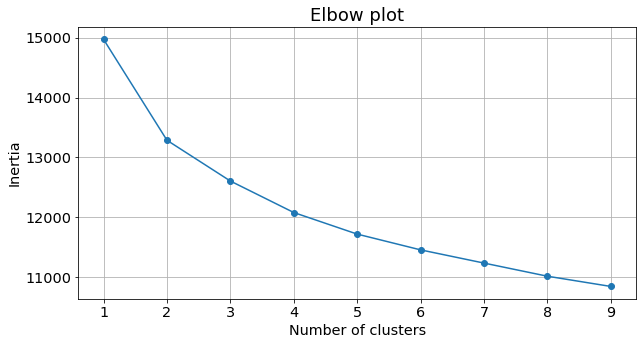



Silhouette method:


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k (clusters) = 2 is 0.11333391509438047


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k (clusters) = 3 is 0.06752484686386223
Silhouette score for k (clusters) = 4 is 0.07199776784435709


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k (clusters) = 5 is 0.05725816099761751


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k (clusters) = 6 is 0.049017575590438046


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k (clusters) = 7 is 0.0473258108480826
Silhouette score for k (clusters) = 8 is 0.04775985824607974


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k (clusters) = 9 is 0.04290048844251386


In [33]:
# CHOOSING THE OPTIMAL K VALUE #
# there is various methods to choose the optimun value of k. We'll start using the elbow plot method,
# and then proceed to the silhouette method. 
# The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. 

# 1. ELBOW PLOT
# the elbow plot alows us to plot inercia (measure of how well the data was clustered by the KM alg) against the number of clusters. 
def optimise_k(data,max_k):
  means=[]
  inertias=[]
  for k in range(1,max_k):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

  fig=plt.subplots(figsize=(10,5))
  plt.plot(means,inertias,"o-")
  plt.xlabel("Number of clusters")
  plt.ylabel("Inertia")
  plt.grid(True)
  plt.title("Elbow plot", size=18)
  plt.show()

optimise_k(data_clean,10)
# Optimun value of k: 4. 

# 2. THE SILHOUETTE METHOD
# The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
print("\n")
print("Silhouette method:")
for i in range(2,10):
  labels=cluster.KMeans(n_clusters=i, init="k-means++",random_state=200).fit(data_clean).labels_
  print("Silhouette score for k (clusters) = "+str(i)+" is " + str(metrics.silhouette_score(data_clean,labels,metric="euclidean", sample_size=1000,random_state=200)))



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


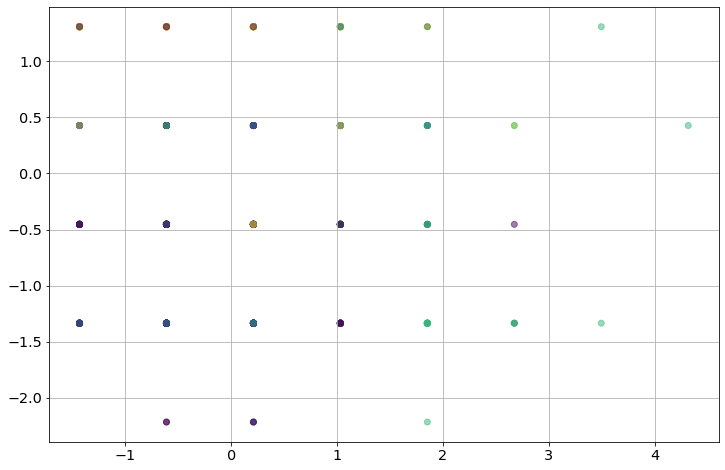

In [34]:
# CLUSTERING #

# 1. APPLY K-MEANS CLUSTERING
kmeans = KMeans(n_clusters=4)
label=kmeans.fit(data_clean)

# 2. ADD THE COLUMN OF THE CLUSTER (optional)
data_clean["kmeans_4"]=kmeans.labels_

# 3. PLOT THE RESULT
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots()
plt.scatter(data_clean.iloc[:,0],data_clean.iloc[:,1],alpha=0.5,c=kmeans.labels_)
plt.grid(); plt.show()
